In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
iris = sns.load_dataset("iris")

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


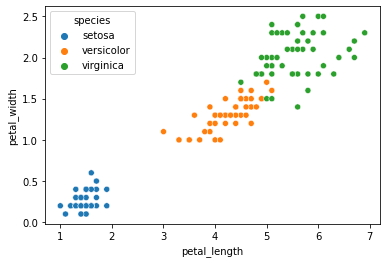

In [6]:
sns.scatterplot(x = "petal_length", y="petal_width", data=iris, hue="species")
plt.show()

In [7]:
X = iris.drop("species", axis=1)
st_scaler = StandardScaler()
X_scaled = st_scaler.fit_transform(X)

In [8]:
km = KMeans(n_clusters=2)
km.fit(X_scaled)

KMeans(n_clusters=2)

In [10]:
iris["k=2"] = km.predict(X_scaled)

In [11]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,k=2
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [17]:
pd.DataFrame(data = X_scaled, columns = iris.columns[:4])

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [24]:
center1 = st_scaler.inverse_transform(km.cluster_centers_)[0][-2:]
center2 = st_scaler.inverse_transform(km.cluster_centers_)[1][-2:]

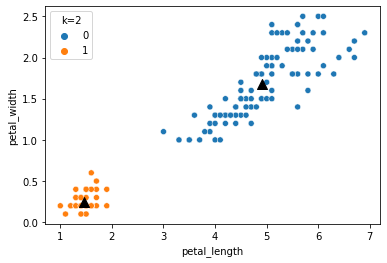

In [27]:
sns.scatterplot(x="petal_length", y="petal_width", data=iris, hue="k=2")
plt.scatter(center1[0], center1[1], marker='^', s=100, c='k')
plt.scatter(center2[0], center2[1], marker='^', s=100, c='k')
plt.show()

In [28]:
km.inertia_

222.36170496502294

In [29]:
km = KMeans(n_clusters=3)

km.fit(X_scaled)
iris["k=3"] = km.predict(X_scaled)

In [32]:
center1 = st_scaler.inverse_transform(km.cluster_centers_)[0][-2:]
center2 = st_scaler.inverse_transform(km.cluster_centers_)[1][-2:]
center3 = st_scaler.inverse_transform(km.cluster_centers_)[2][-2:]

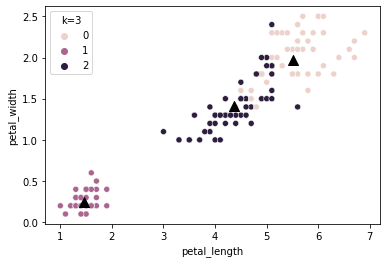

In [33]:
sns.scatterplot(x="petal_length", y="petal_width", data=iris, hue="k=3")
plt.scatter(center1[0], center1[1], marker='^', s=100, c='k')
plt.scatter(center2[0], center2[1], marker='^', s=100, c='k')
plt.scatter(center3[0], center3[1], marker='^', s=100, c='k')
plt.show()

In [34]:
km.inertia_

139.82049635974968

In [35]:
inertias = []

for k in range(1,51):
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

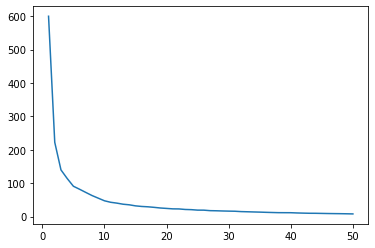

In [38]:
plt.plot(range(1, 51), inertias)
plt.show()

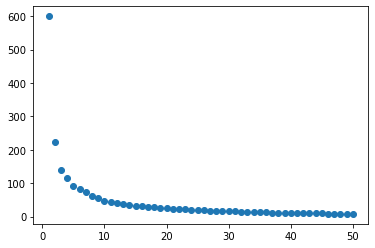

In [40]:
plt.scatter(range(1, 51), inertias)
plt.show()